In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.pipeline import make_pipeline

In [3]:
import tensorflow as tf
from tensorflow import keras

# Load Calibration Data

In [54]:
df_t0 = pd.read_csv('../tip1\Cali.csv')
# df_t0 = pd.read_csv('../tip1\zv1_zd5_t8_20230622_181736.csv')

print(df_t0.shape)

# # Plot the data
# plt.figure(figsize=(10,5))
# # plt.scatter(df_t0.index, df_t0['Sensor_0'], label='sensor0')
# plt.scatter(df_t0.index, df_t0['Sensor_1'], label='sensor1')
# plt.scatter(df_t0.index, df_t0['Sensor_2'], label='sensor2')
# plt.scatter(df_t0.index, df_t0['Sensor_3'], label='sensor3')
# plt.legend()
# plt.xlabel('x')
# plt.ylabel('sensor value')
# plt.title('sensor value vs x')
# plt.grid(True)
# plt.show()

(4073, 4)


In [55]:
# Minus the offset for first 4 collumns based on the average reading of the first 100 rows
print("reading for 0 mm displacement")
print(df_t0['Sensor_0'].iloc[:100].mean())
print(df_t0['Sensor_1'].iloc[:100].mean())
print(df_t0['Sensor_2'].iloc[:100].mean())
print(df_t0['Sensor_3'].iloc[:100].mean())

# Print the max value of each sensor
print("reading for 4 mm displacement")
print(df_t0['Sensor_0'].max())
print(df_t0['Sensor_1'].max())
print(df_t0['Sensor_2'].max())
print(df_t0['Sensor_3'].max())

mean = [df_t0['Sensor_0'].iloc[:100].mean(), df_t0['Sensor_1'].iloc[:100].mean(), df_t0['Sensor_2'].iloc[:100].mean(), df_t0['Sensor_3'].iloc[:100].mean()]
max = [df_t0['Sensor_0'].max(), df_t0['Sensor_1'].max(), df_t0['Sensor_2'].max(), df_t0['Sensor_3'].max()]

df_t0['Sensor_0'] = df_t0['Sensor_0'] - mean[0]
df_t0['Sensor_1'] = df_t0['Sensor_1'] - mean[1]
df_t0['Sensor_2'] = df_t0['Sensor_2'] - mean[2]
df_t0['Sensor_3'] = df_t0['Sensor_3'] - mean[3]

# Calibrate the sensor reading by devided the max value of each sensor
df_t0['Sensor_0'] = df_t0['Sensor_0'] / (max[0] - mean[0])
df_t0['Sensor_1'] = df_t0['Sensor_1'] / (max[1] - mean[1])
df_t0['Sensor_2'] = df_t0['Sensor_2'] / (max[2] - mean[2])
df_t0['Sensor_3'] = df_t0['Sensor_3'] / (max[3] - mean[3])

reading for 0 mm displacement
101267.2375
104259.485
101574.9875
113959.65
reading for 4 mm displacement
112952.75
118557.5
117048.5
131700.0


# Data Preparation

(16917, 7)


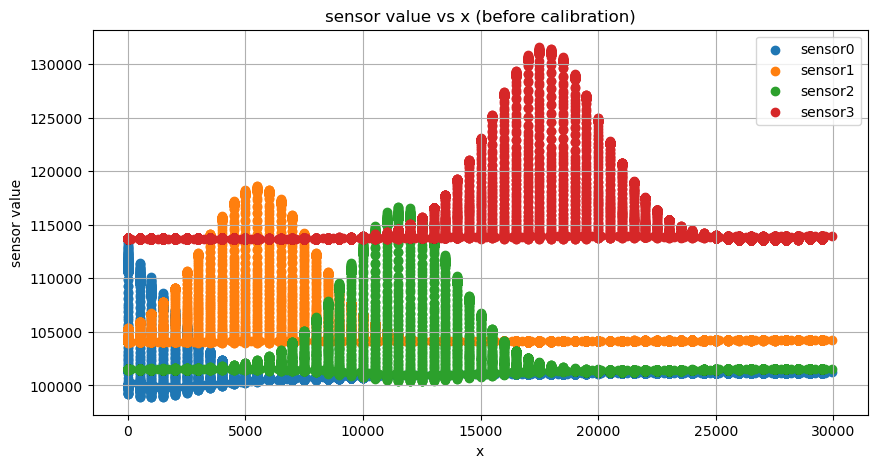

In [66]:
df_t0 = pd.read_csv('../tip1\\test_full_20230706_175400.csv')
# df_t0 = pd.read_csv('../tip1\zv1_zd5_t8_20230622_181736.csv')
# df_t0 = pd.read_csv('generated_data.csv')
print(df_t0.shape)

# Plot the data
plt.figure(figsize=(10,5))
plt.scatter(df_t0['x'], df_t0['Sensor_0'], label='sensor0')
plt.scatter(df_t0['x'], df_t0['Sensor_1'], label='sensor1')
plt.scatter(df_t0['x'], df_t0['Sensor_2'], label='sensor2')
plt.scatter(df_t0['x'], df_t0['Sensor_3'], label='sensor3')
plt.legend()
plt.xlabel('x')
plt.ylabel('sensor value')
plt.title('sensor value vs x (before calibration)')
plt.grid(True)
plt.show()

## Calibration

In [67]:
df_t0['Sensor_0'] = df_t0['Sensor_0'] - mean[0]
df_t0['Sensor_1'] = df_t0['Sensor_1'] - mean[1]
df_t0['Sensor_2'] = df_t0['Sensor_2'] - mean[2]
df_t0['Sensor_3'] = df_t0['Sensor_3'] - mean[3]


# Calibrate the sensor reading by devided the max value of each sensor
df_t0['Sensor_0'] = df_t0['Sensor_0'] / (max[0] - mean[0])
df_t0['Sensor_1'] = df_t0['Sensor_1'] / (max[1] - mean[1])
df_t0['Sensor_2'] = df_t0['Sensor_2'] / (max[2] - mean[2])
df_t0['Sensor_3'] = df_t0['Sensor_3'] / (max[3] - mean[3])

In [68]:
# delete the row with x != multiple of 1000
# df_t0 = df_t0[df_t0['x'] % 1000 == 0]

# Only remain the data with x is between 6000 and 18000
# df_t0 = df_t0[df_t0['x'] >= 6000]
# df_t0 = df_t0[df_t0['x'] <= 18000]
df_t0 = df_t0[df_t0['x'] >= 0]
df_t0 = df_t0[df_t0['x'] <= 12000]

# divide the 'x' by 1000
df_t0['x'] = df_t0['x'] / 1000

# # Remain the data, which z is the maximum value for fixed x
# df_t0 = df_t0.groupby('x').max()

# Remain the data, which z greater than 2000
df_t0 = df_t0[df_t0['z'] > 1200]

# z divided by 480 steps/mm
df_t0['z'] = df_t0['z']/480



## Visualization

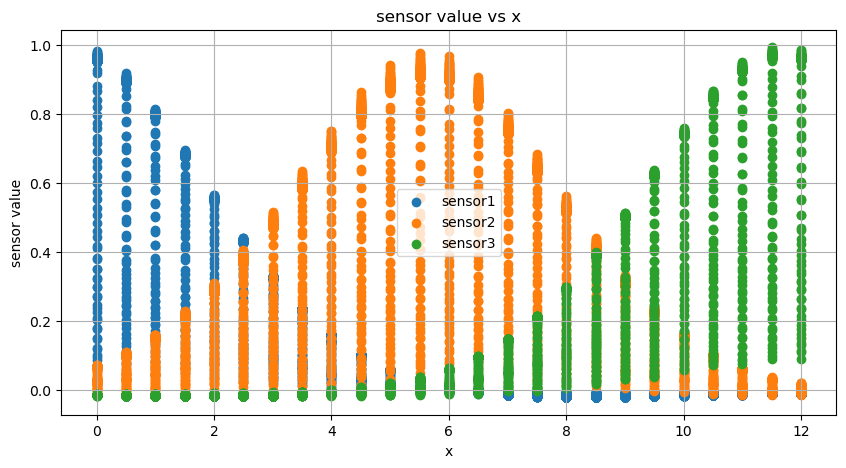

In [34]:
# Plot the data
plt.figure(figsize=(10,5))
# plt.scatter(df_t0['x'], df_t0['Sensor_0'], label='sensor0')
plt.scatter(df_t0['x'], df_t0['Sensor_1'], label='sensor1')
plt.scatter(df_t0['x'], df_t0['Sensor_2'], label='sensor2')
plt.scatter(df_t0['x'], df_t0['Sensor_3'], label='sensor3')
plt.legend()
plt.xlabel('x')
plt.ylabel('sensor value')
plt.title('sensor value vs x')
plt.grid(True)
plt.show()

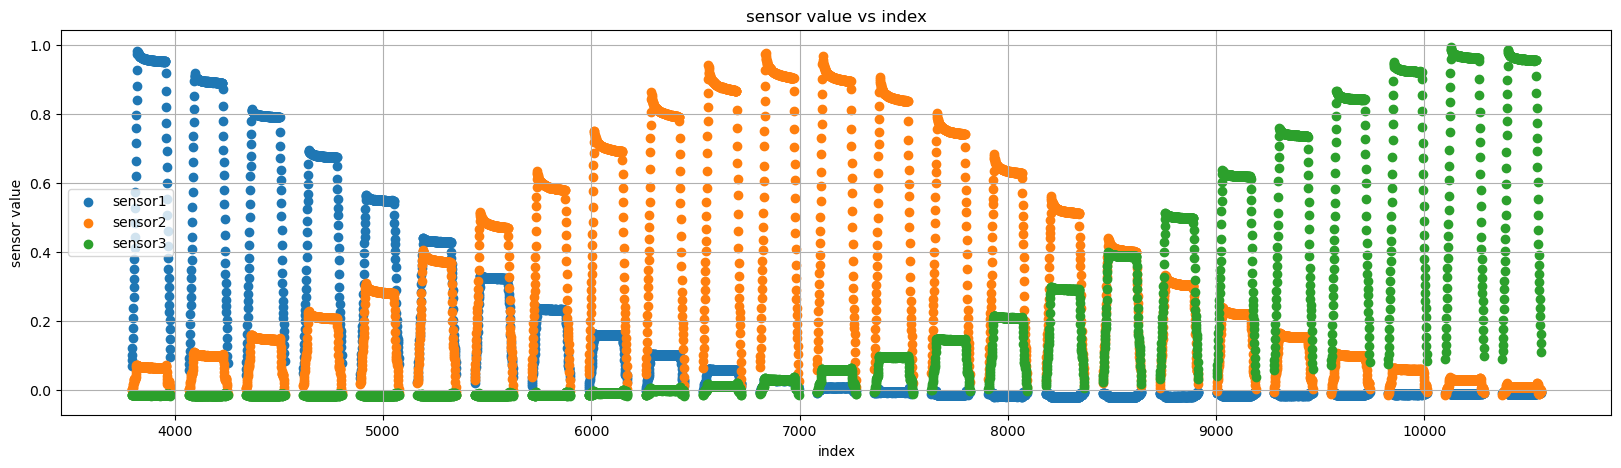

In [35]:
# Plot the data
plt.figure(figsize=(20,5))
# plt.scatter(df_t0['x'], df_t0['Sensor_0'], label='sensor0')
plt.scatter(df_t0.index, df_t0['Sensor_1'], label='sensor1')
plt.scatter(df_t0.index, df_t0['Sensor_2'], label='sensor2')
plt.scatter(df_t0.index, df_t0['Sensor_3'], label='sensor3')
plt.legend()
plt.xlabel('index')
plt.ylabel('sensor value')
plt.title('sensor value vs index')
plt.grid(True)
plt.show()

### Heat Map

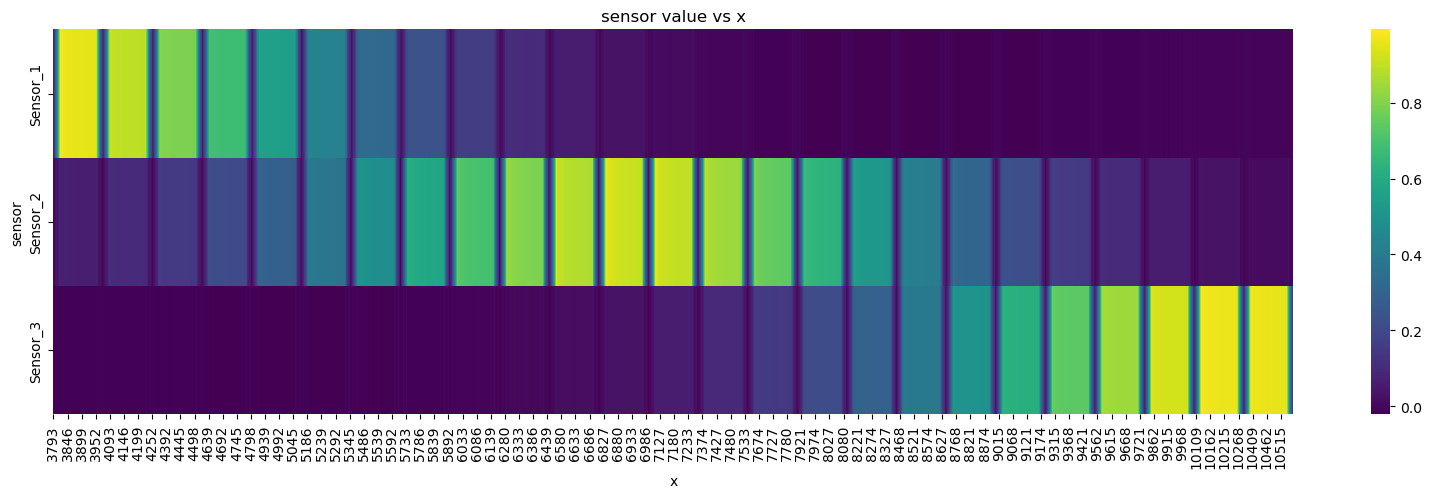

In [36]:
# Draw Heatmap, for for different sensor on the vertical axis, and 'x' on the horizontal axis
plt.figure(figsize=(20,5))
sns.heatmap(df_t0[['Sensor_1', 'Sensor_2', 'Sensor_3']].T, cmap='viridis')
plt.xlabel('x')
plt.ylabel('sensor')
plt.title('sensor value vs x')
plt.show()



# Training

## Multi-Variable Regression

In [69]:
# X = df_t0[[ 'Sensor_1','Sensor_2', 'Sensor_3']].iloc[:, :].values
X = df_t0[[ 'Sensor_0', 'Sensor_1','Sensor_2']].iloc[:, :].values
y = df_t0[['x','z']].values

In [38]:
X

array([[ 6.82447878e-02, -4.67734782e-04, -1.45797574e-02],
       [ 8.57472174e-02, -7.99753773e-05, -1.49320617e-02],
       [ 1.01396243e-01,  1.32565247e-03, -1.51434442e-02],
       ...,
       [-7.34262763e-03,  1.16408605e-03,  1.61205951e-01],
       [-7.76226630e-03, -2.27727867e-03,  1.35389099e-01],
       [-7.15029324e-03, -6.96270482e-03,  1.11066016e-01]])

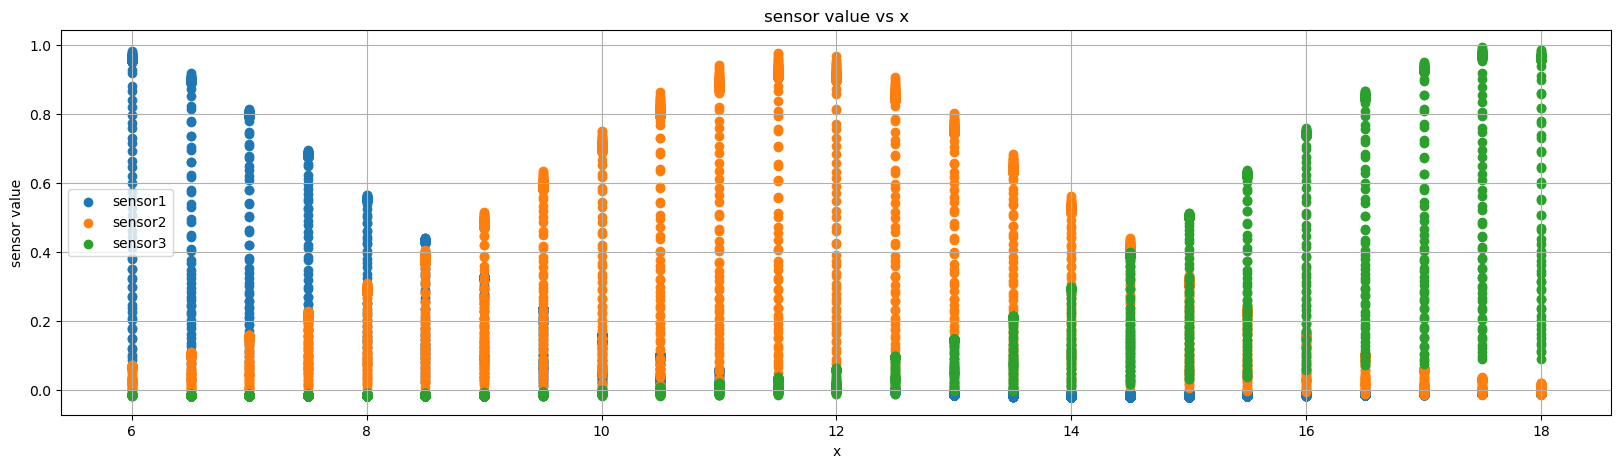

In [27]:
# Plot the data
plt.figure(figsize=(20,5))
plt.scatter(df_t0['x'], df_t0['Sensor_1'], label='sensor1')
plt.scatter(df_t0['x'], df_t0['Sensor_2'], label='sensor2')
plt.scatter(df_t0['x'], df_t0['Sensor_3'], label='sensor3')
plt.legend()
plt.xlabel('x')
plt.ylabel('sensor value')
plt.title('sensor value vs x')
plt.grid(True)
plt.show()

In [12]:
X

array([[ 6.82447878e-02, -4.67734782e-04, -1.45797574e-02],
       [ 8.57472174e-02, -7.99753773e-05, -1.49320617e-02],
       [ 1.01396243e-01,  1.32565247e-03, -1.51434442e-02],
       ...,
       [-7.34262763e-03,  1.16408605e-03,  1.61205951e-01],
       [-7.76226630e-03, -2.27727867e-03,  1.35389099e-01],
       [-7.15029324e-03, -6.96270482e-03,  1.11066016e-01]])

In [70]:
# Split the data into training and testing and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# Create a pipeline for polynomial regression
model_reg = make_pipeline(PolynomialFeatures(degree=7), LinearRegression())

# Train the model
model_reg.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred = model_reg.predict(X_test)

# # Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2}")

# Calculate the mean squared error for training and test sets
mse_train = mean_squared_error(y_train, model_reg.predict(X_train))
mse_test = mean_squared_error(y_test, y_pred)
print(f"Mean squared error for training set: {mse_train}")
print(f"Mean squared error for test set: {mse_test}")


R-squared score: 0.9874073661538159
Mean squared error for training set: 0.09376148056713207
Mean squared error for test set: 0.1374391338279693


In [71]:
# Using cross validation to evaluate the model
scores = cross_val_score(model_reg, X_train, y_train, cv=5)
print(f"Cross validation scores: {scores}")
print(f"Average cross-validation scroe: {scores.mean()}")
print(f"Standard deviation of cross-validation scores: {scores.std()}")


Cross validation scores: [0.98935197 0.98874725 0.98566856 0.98750735 0.99390879]
Average cross-validation scroe: 0.9890367871214358
Standard deviation of cross-validation scores: 0.002742397225568786


In [72]:
# Print the predicted values and the actual values one by one
for i in range(len(y_pred)):
    print(f"Predicted: {y_pred[i]}, Actual: {y_test[i]}")
    

Predicted: [3.0171989  3.99310889], Actual: [3. 4.]
Predicted: [11.43589765  2.67141627], Actual: [10.5     2.6875]
Predicted: [6.49305156 3.99587695], Actual: [6.5 4. ]
Predicted: [4.99458798 3.99456485], Actual: [5. 4.]
Predicted: [6.05630702 2.81534972], Actual: [6.5   2.825]
Predicted: [11.48855355  3.99605059], Actual: [11.5  4. ]
Predicted: [8.00335983 3.99761847], Actual: [8. 4.]
Predicted: [1.9845525  3.99846746], Actual: [2. 4.]
Predicted: [6.0831026  4.00479492], Actual: [6. 4.]
Predicted: [0.48870577 3.99782142], Actual: [0.5 4. ]
Predicted: [6.49463148 3.99922283], Actual: [6.5 4. ]
Predicted: [2.50663037 4.00269854], Actual: [2.5 4. ]
Predicted: [6.99791855 3.99542796], Actual: [7. 4.]
Predicted: [8.98946624 3.99257505], Actual: [9. 4.]
Predicted: [12.01895548  3.99196325], Actual: [12.  4.]
Predicted: [2.99268891 4.00281946], Actual: [3. 4.]
Predicted: [0.44113052 3.85959292], Actual: [0.   3.85]
Predicted: [3.02281881 4.00488188], Actual: [3. 4.]
Predicted: [6.00995521 3

In [74]:
# Combine the models, make predictions for all the data in the dataframe
y_pred_all = model_reg.predict(X)

# Add the predicted values to the dataframe
df_t0['x_pred'] = y_pred_all[:, 0]
df_t0['z_pred'] = y_pred_all[:, 1]

c:\Users\59784\.conda\envs\data\lib\site-packages\ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until


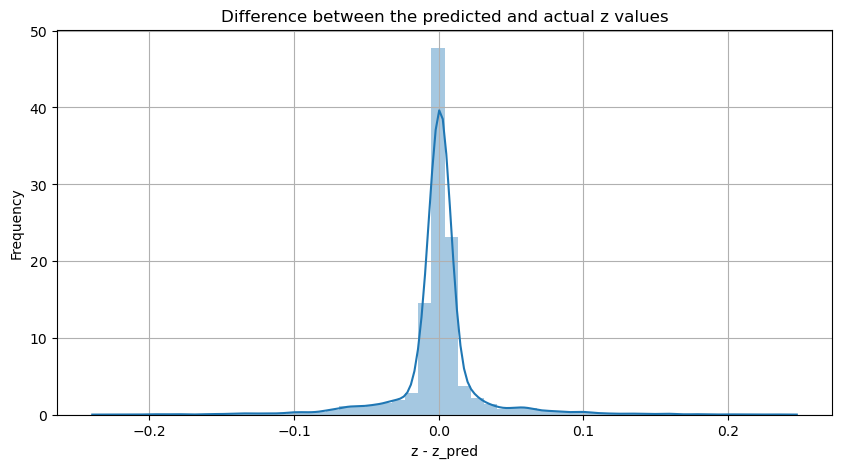

In [75]:
# Plot the difference between the predicted and actual values in a distribution plot
plt.figure(figsize=(10,5))
sns.distplot(df_t0['z'] - df_t0['z_pred'], bins=50)
plt.xlabel('z - z_pred')
plt.ylabel('Frequency')
plt.title('Difference between the predicted and actual z values')
plt.grid(True)
plt.show()

c:\Users\59784\.conda\envs\data\lib\site-packages\ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until


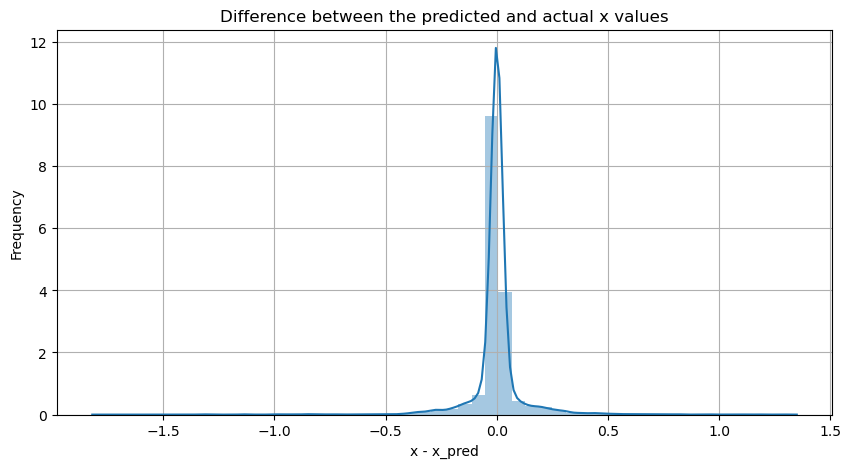

In [89]:
# Plot the difference between the predicted and actual values in a distribution plot
plt.figure(figsize=(10,5))
sns.distplot(df_t0['x'] - df_t0['x_pred'], bins=50)
plt.xlabel('x - x_pred')
plt.ylabel('Frequency')
plt.title('Difference between the predicted and actual x values')
plt.grid(True)
plt.show()


## Multilayer Perceptron

In [18]:
# Using MLP Regressor
# Create a pipeline for polynomial regression
model_MLP = make_pipeline(MLPRegressor(hidden_layer_sizes=(100, 100, 100), max_iter=1000, random_state=42))

# Train the model
model_MLP.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred = model_MLP.predict(X_test)

# # Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2}")

# Calculate the mean squared error for training and test sets
mse_train = mean_squared_error(y_train, model_MLP.predict(X_train))
mse_test = mean_squared_error(y_test, y_pred)
print(f"Mean squared error for training set: {mse_train}")
print(f"Mean squared error for test set: {mse_test}")

R-squared score: 0.9951406323644469
Mean squared error for training set: 0.015808932791041105
Mean squared error for test set: 0.01891006890853858


In [19]:
# Print the predicted values and the actual values one by one
for i in range(len(y_pred)):
    print(f"Predicted: {y_pred[i]}, Actual: {y_test[i]}")
    

Predicted: [9.03823762 4.00901942], Actual: [9. 4.]
Predicted: [16.79800303  2.69491824], Actual: [16.5   2.65]
Predicted: [12.48969915  3.98892298], Actual: [12.5  4. ]
Predicted: [11.00983961  3.99111568], Actual: [11.  4.]
Predicted: [12.23707755  2.79628873], Actual: [12.5    2.725]
Predicted: [17.56048703  3.98898613], Actual: [17.5  4. ]
Predicted: [13.99775926  3.97166025], Actual: [14.  4.]
Predicted: [8.00028866 3.99248619], Actual: [8. 4.]
Predicted: [11.88117547  4.0541934 ], Actual: [12.  4.]
Predicted: [6.50007766 3.99564422], Actual: [6.5 4. ]
Predicted: [12.48164474  3.98700123], Actual: [12.5  4. ]
Predicted: [8.49467323 3.983172  ], Actual: [8.5 4. ]
Predicted: [12.99131153  3.97772845], Actual: [13.  4.]
Predicted: [15.01658868  3.99443356], Actual: [15.  4.]
Predicted: [18.13430734  3.93830678], Actual: [18.  4.]
Predicted: [9.04375024 4.00832762], Actual: [9. 4.]
Predicted: [6.33428536 3.86418559], Actual: [6.     3.8875]
Predicted: [9.06509941 4.02545425], Actual: 

In [20]:
# Using cross validation to evaluate the model
scores = cross_val_score(model_MLP, X_train, y_train, cv=5)
print(f"Cross validation scores: {scores}")
print(f"Average cross-validation score: {scores.mean()}")
print(f"Standard deviation of cross-validation scores: {scores.std()}")

Cross validation scores: [0.99355695 0.99412885 0.99389917 0.99519691 0.9941789 ]
Average cross-validation score: 0.9941921575932096
Standard deviation of cross-validation scores: 0.0005482793889741288


In [21]:
# Combine the models, make predictions for all the data in the dataframe
y_pred_all = model_MLP.predict(X)

# Add the predicted values to the dataframe
df_t0['x_pred_MLP'] = y_pred_all[:, 0]
df_t0['z_pred_MLP'] = y_pred_all[:, 1]

c:\Users\59784\.conda\envs\data\lib\site-packages\ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until


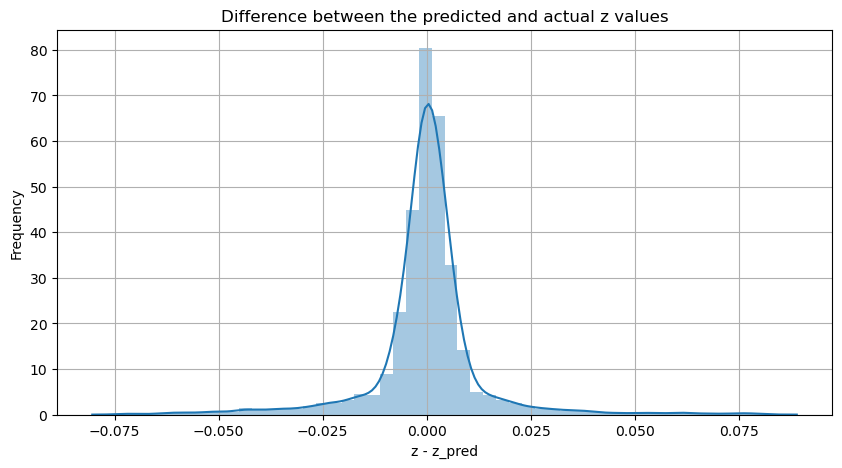

In [22]:
# Plot the difference between the predicted and actual values in a distribution plot
plt.figure(figsize=(10,5))
sns.distplot(df_t0['z'] - df_t0['z_pred'], bins=50)
plt.xlabel('z - z_pred')
plt.ylabel('Frequency')
plt.title('Difference between the predicted and actual z values')
plt.grid(True)
plt.show()

c:\Users\59784\.conda\envs\data\lib\site-packages\ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until


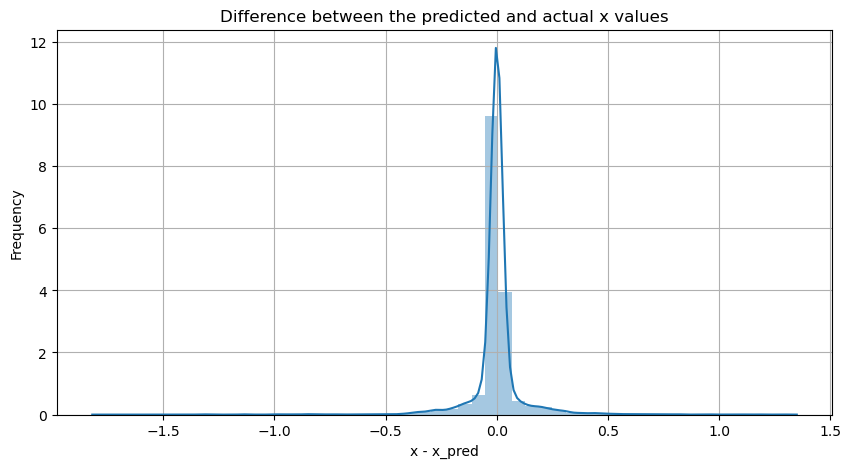

In [23]:
# Plot the difference between the predicted and actual values in a distribution plot
plt.figure(figsize=(10,5))
sns.distplot(df_t0['x'] - df_t0['x_pred'], bins=50)
plt.xlabel('x - x_pred')
plt.ylabel('Frequency')
plt.title('Difference between the predicted and actual x values')
plt.grid(True)
plt.show()


In [39]:
def build_model():
  model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),                  
    keras.layers.Dense(100, activation=tf.nn.relu),
    keras.layers.Dense(100, activation=tf.nn.relu),
    keras.layers.Dense(100, activation=tf.nn.relu),
    keras.layers.Dense(2)
  ], name="MLP_model")

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])
  return model

model = build_model()
model.summary()

Model: "MLP_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   


 dense_18 (Dense)            (None, 100)               400       
                                                                 
 dense_19 (Dense)            (None, 100)               10100     
                                                                 
 dense_20 (Dense)            (None, 100)               10100     
                                                                 
 dense_21 (Dense)            (None, 2)                 202       
                                                                 
Total params: 20,802
Trainable params: 20,802
Non-trainable params: 0
_________________________________________________________________


In [40]:
EPOCHS = 100
# Store training stats
history = model.fit(X_train, y_train, epochs=EPOCHS,
                    validation_split=0.2, verbose=1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 18.3878 - mae: 2.4657 - val_loss: 1.0748 - val_mae: 0.6069
Epoch 2/100
94/94 [==============================] - 0s 1ms/step - loss: 0.6583 - mae: 0.4607 - val_loss: 0.5666 - val_mae: 0.4989
Epoch 3/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4608 - mae: 0.3845 - val_loss: 0.3705 - val_mae: 0.3567
Epoch 4/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3776 - mae: 0.3564 - val_loss: 0.2676 - val_mae: 0.2911
Epoch 5/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3230 - mae: 0.3360 - val_loss: 0.4266 - val_mae: 0.4677
Epoch 6/100
94/94 [==============================] - 0s 1ms/step - loss: 0.2746 - mae: 0.3117 - val_loss: 0.3643 - val_mae: 0.4802
Epoch 7/100
94/94 [==============================] - 0s 1ms/step - loss: 0.2259 - mae: 0.2900 - val_loss: 0.1917 - val_mae: 0.2965
Epoch 8/100
94/94 [==============================] - 0s 1ms/step - loss: 0.1969 - 

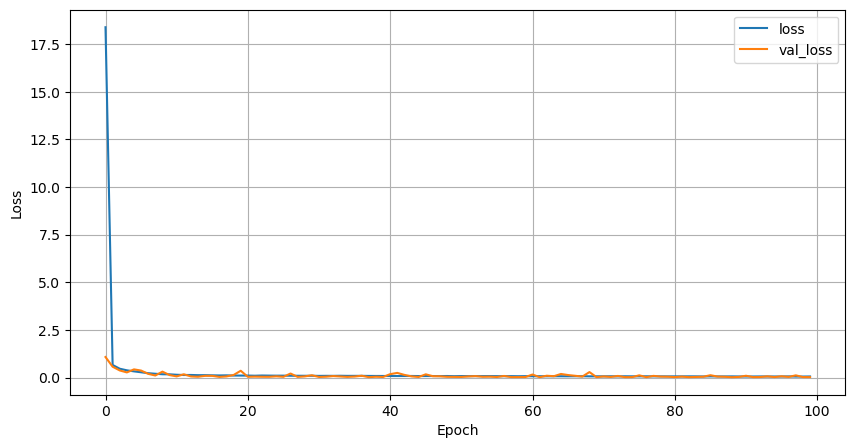

In [41]:
# Plot the loss function
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [27]:
model.predict(X_test).shape

30/30 [==============================] - 0s 586us/step


(932, 2)

In [42]:
# Print the MSE for training and test sets
loss, mae = model.evaluate(X_train, y_train, verbose=0)
print(f"Training set Mean Abs Error: {mae**2}")
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test set Mean Abs Error: {mae**2}")

Training set Mean Abs Error: 0.011705877367938433
Test set Mean Abs Error: 0.012066489826993099


In [47]:
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
# Create an instance of the KerasRegressor
model = KerasRegressor(build_fn=build_model, epochs=10, batch_size=32, verbose=0)
# Perform cross-validation
cross_val_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculate mean squared error (MSE) scores
mse_scores = -cross_val_scores

# Calculate mean and standard deviation of MSE scores
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)

# Print the results
print("Cross-Validation MSE Scores:", mse_scores)
print("Mean MSE:", mean_mse)
print("Standard Deviation of MSE:", std_mse)

c:\Users\59784\.conda\envs\data\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  This is separate from the ipykernel package so we can avoid doing imports until


Cross-Validation MSE Scores: [0.06891108 0.10270457 0.17984903 0.12666601 0.04394138]
Mean MSE: 0.10441441284018042
Standard Deviation of MSE: 0.04712942622666106


# Deploy 

In [24]:
df_test = pd.read_csv('generated_data_2.csv')

In [25]:
# calibrate the data
df_test['Sensor_0'] = df_test['Sensor_0'] - mean[0]
df_test['Sensor_1'] = df_test['Sensor_1'] - mean[1]
df_test['Sensor_2'] = df_test['Sensor_2'] - mean[2]
df_test['Sensor_3'] = df_test['Sensor_3'] - mean[3]


# Calibrate the sensor reading by devided the max value of each sensor
df_test['Sensor_0'] = df_test['Sensor_0'] / (max[0] - mean[0])
df_test['Sensor_1'] = df_test['Sensor_1'] / (max[1] - mean[1])
df_test['Sensor_2'] = df_test['Sensor_2'] / (max[2] - mean[2])
df_test['Sensor_3'] = df_test['Sensor_3'] / (max[3] - mean[3])

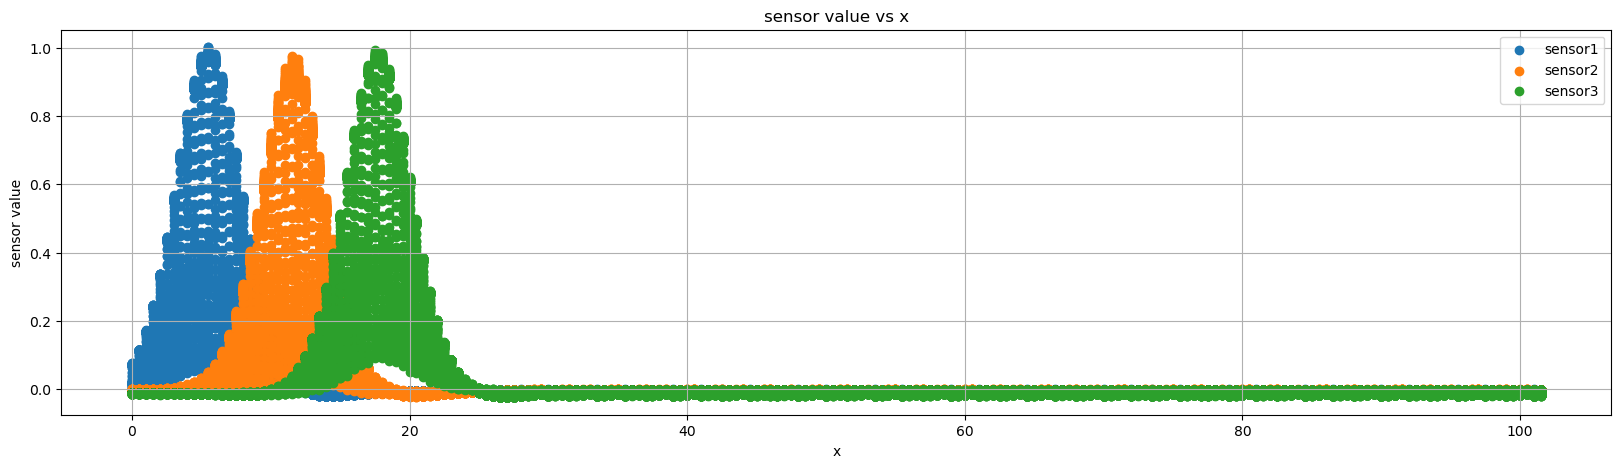

In [15]:
# Plot the data
plt.figure(figsize=(20,5))
plt.scatter(df_test['x'], df_test['Sensor_1'], label='sensor1')
plt.scatter(df_test['x'], df_test['Sensor_2'], label='sensor2')
plt.scatter(df_test['x'], df_test['Sensor_3'], label='sensor3')
plt.legend()
plt.xlabel('x')
plt.ylabel('sensor value')
plt.title('sensor value vs x')
plt.grid(True)
plt.show()

In [26]:
# delete the row with x != multiple of 1000
# df_t0 = df_t0[df_t0['x'] % 1000 == 0]

# # Only remain the data with x is between 6000 and 18000
# df_test = df_test[df_test['x'] >= 6000]
# df_test = df_test[df_test['x'] <= 18000]

# divide the 'x' by 1000
df_test['x'] = df_test['x'] / 1000

# # Remain the data, which z is the maximum value for fixed x
# df_t0 = df_t0.groupby('x').max()

# Remain the data, which z greater than 2000
df_test = df_test[df_test['z'] > 1200]

# z divided by 480 steps/mm
df_test['z'] = df_test['z']/480

In [47]:
df_test

,Sensor_0,Sensor_1,Sensor_2,Sensor_3,x,z,time,Sensor_4,Sensor_5,Sensor_6,Sensor_7,Sensor_8,Sensor_9,Sensor_10,Sensor_11,Sensor_12,Sensor_13,Sensor_14,Sensor_15
501,0.076174,0.002237,0.0,0.000373,0.0,2.5125,20.711298,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
502,0.098681,0.002426,0.0,0.000331,0.0,2.5750,20.772340,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
503,0.119363,0.003716,0.0,0.000512,0.0,2.6250,20.825545,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
504,0.135460,0.005762,0.0,0.000526,0.0,2.6875,20.900778,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
505,0.158444,0.007464,0.0,0.000498,0.0,2.7375,20.942551,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56359,0.000000,0.011470,0.0,0.012085,101.5,2.7625,NaN,0.012586,0.000506,0.0,0.0,0.011722,0.012561,0.009835,0.002904,0.000502,0.0,0.001605,0.010870
56360,0.000000,0.011334,0.0,0.012492,101.5,2.7000,NaN,0.012862,0.000521,0.0,0.0,0.012240,0.012007,0.009249,0.002638,0.000032,0.0,0.000914,0.010870
56361,0.000000,0.011350,0.0,0.011298,101.5,2.6375,NaN,0.012241,0.001150,0.0,0.0,0.011943,0.012428,0.009343,0.001990,0.000001,0.0,0.000000,0.011150
56362,0.000000,0.010279,0.0,0.012098,101.5,2.5875,NaN,0.012129,0.000456,0.0,0.0,0.012210,0.011923,0.010052,0.002269,0.000111,0.0,0.000000,0.010814


In [39]:
df_test.shape

(38012, 19)

In [76]:
X_test = df_t0[['Sensor_0','Sensor_1','Sensor_2']].values
y_test = df_t0[['x', 'z']].values



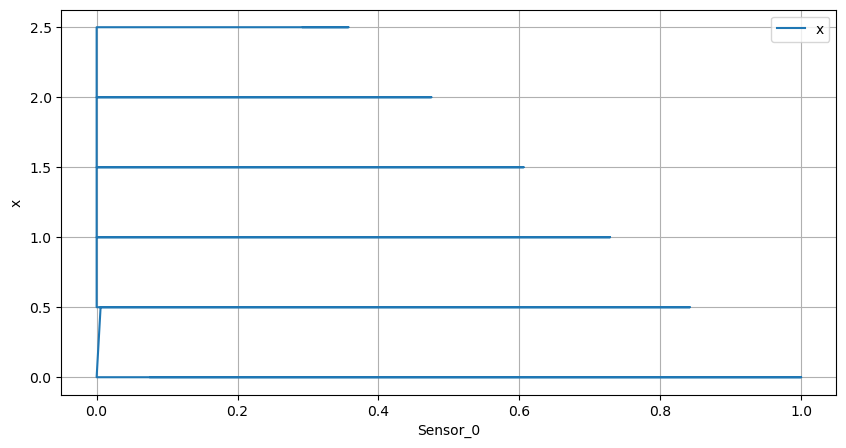

In [51]:
X_test

array([[ 8.32879602e-02, -1.24832013e-02, -3.86062958e-03],
       [ 1.06500464e-01, -1.22908669e-02, -3.95756943e-03],
       [ 1.27830294e-01, -1.09794961e-02, -3.66674987e-03],
       ...,
       [-2.46662267e-02,  3.06091440e-03,  5.50464867e-02],
       [-2.50727129e-02, -5.14057371e-05,  2.91150765e-02],
       [-2.48801668e-02, -3.60084949e-03,  8.95158743e-03]])

In [77]:
# test the model
y_pred = model_reg.predict(X_test)

# # Calculate the R-squared score
# r2 = r2_score(y_test, y_pred)
# print(f"R-squared score: {r2}")

# # Calculate the mean squared error for training and test sets
# mse_test = mean_squared_error(y_test, y_pred)
# print(f"Mean squared error for test set: {mse_test}")

In [53]:
y_pred

array([[5.12192231, 2.29528281],
       [4.40741195, 2.22396744],
       [3.84027901, 2.16946791],
       ...,
       [6.38908914, 2.60471744],
       [6.8326125 , 2.48066285],
       [7.73500998, 2.4253868 ]])

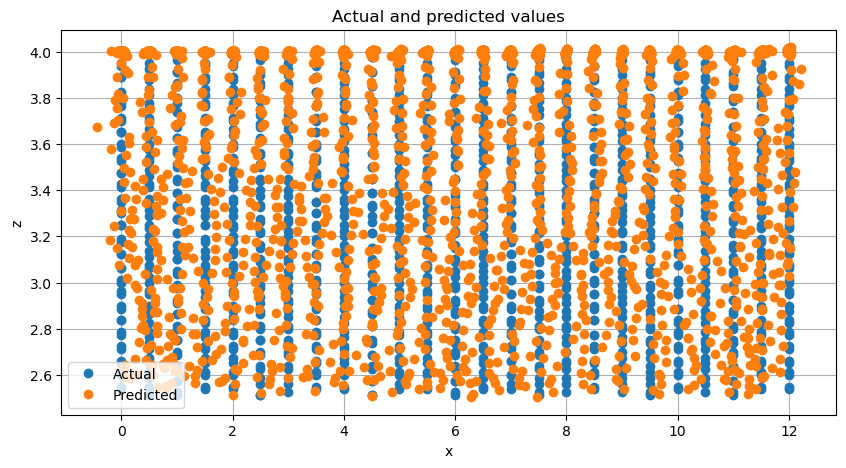

In [46]:
# plot the results
plt.figure(figsize=(10,5))
plt.plot(y_test[:, 0], y_test[:, 1], 'o', label='Actual')
plt.plot(y_pred[:, 0], y_pred[:, 1], 'o', label='Predicted')
plt.xlabel('x')
plt.ylabel('z')
plt.title('Actual and predicted values')
plt.legend()
plt.grid(True)
plt.show()



In [23]:
y_test

array([[ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       ...,
       [nan, nan],
       [nan, nan],
       [nan, nan]])

In [97]:
y_test

,x,z
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
56912,NaN,NaN
56913,NaN,NaN
56914,NaN,NaN
56915,NaN,NaN
